# Kaggle-dataset-analysis
## crime in Boston
# 2019-02-16 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
original=pd.read_csv('./crime.csv',engine='python')

In [3]:
original['YEAR'].unique()

array([2018, 2017, 2016, 2015], dtype=int64)

In [4]:
original['OCCURRED_ON_DATE']=pd.to_datetime(original['OCCURRED_ON_DATE'])

In [5]:
np.isnan(original.any())

INCIDENT_NUMBER        False
OFFENSE_CODE           False
OFFENSE_CODE_GROUP     False
OFFENSE_DESCRIPTION    False
DISTRICT               False
REPORTING_AREA         False
SHOOTING               False
OCCURRED_ON_DATE       False
YEAR                   False
MONTH                  False
DAY_OF_WEEK            False
HOUR                   False
UCR_PART               False
STREET                 False
Lat                    False
Long                   False
Location               False
dtype: bool

In [6]:
original['DISTRICT'].unique()

array(['E18', 'D14', 'B2', 'A1', 'A7', 'C11', nan, 'D4', 'E13', 'B3',
       'C6', 'A15', 'E5'], dtype=object)

## Visualization-by DISTRICT

In [7]:
disgroup=original.groupby(by='DISTRICT')

In [8]:
groupcount=disgroup.count()

In [9]:
groupcount.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
DISTRICT,,,,,,,,,,,,,,,,
A1,36735,36735,36735,36735,36735,12,36735,36735,36735,36735,36735,36733,35186,32947,32947,36735
A15,6663,6663,6663,6663,6663,5,6663,6663,6663,6663,6663,6663,6486,6321,6321,6663
A7,13634,13634,13634,13634,13634,17,13634,13634,13634,13634,13634,13631,13328,13094,13094,13634
B2,51288,51288,51288,51288,51288,352,51288,51288,51288,51288,51288,51272,49445,47488,47488,51288
B3,36400,36400,36400,36400,36400,227,36400,36400,36400,36400,36400,36386,35641,34614,34614,36400


In [10]:
number=groupcount.iloc[:,0]
number=pd.DataFrame(number)

In [11]:
number.rename(columns={'INCIDENT_NUMBER':'NUMBER'},inplace=True)

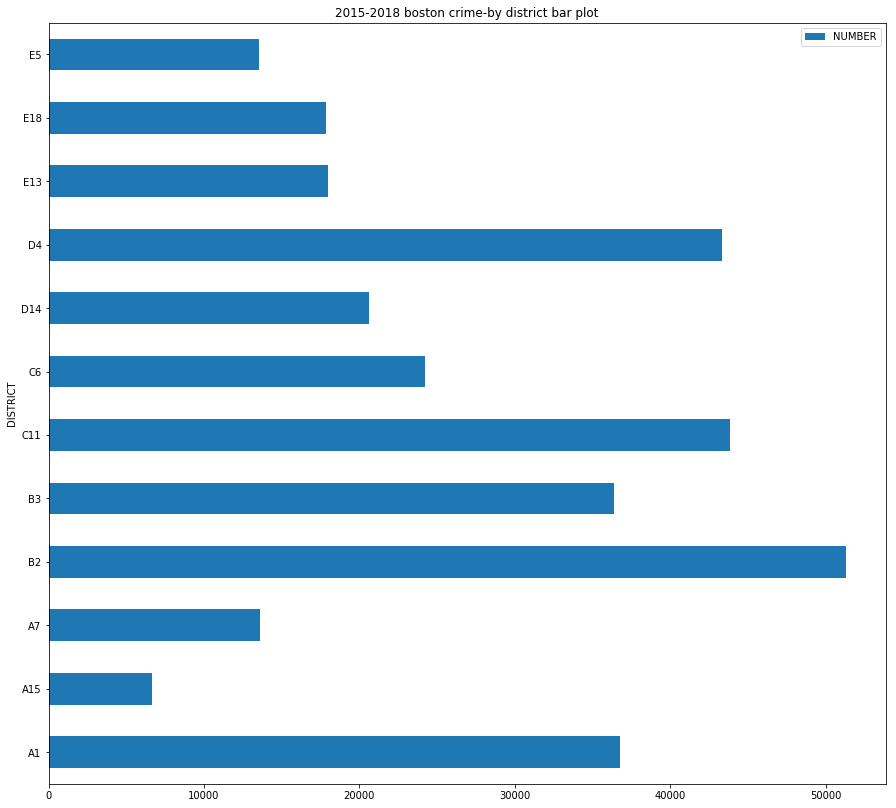

In [12]:
p1=number.plot.barh(title=r'2015-2018 boston crime-by district bar plot',figsize=(15,14))
p1fig=p1.get_figure()
p1fig.savefig('./total_by_district_bar.png')
plt.show()

In [13]:
districtsorted=number.sort_values(by='NUMBER',ascending=False)

In [14]:
top5=districtsorted.iloc[0:5,:]

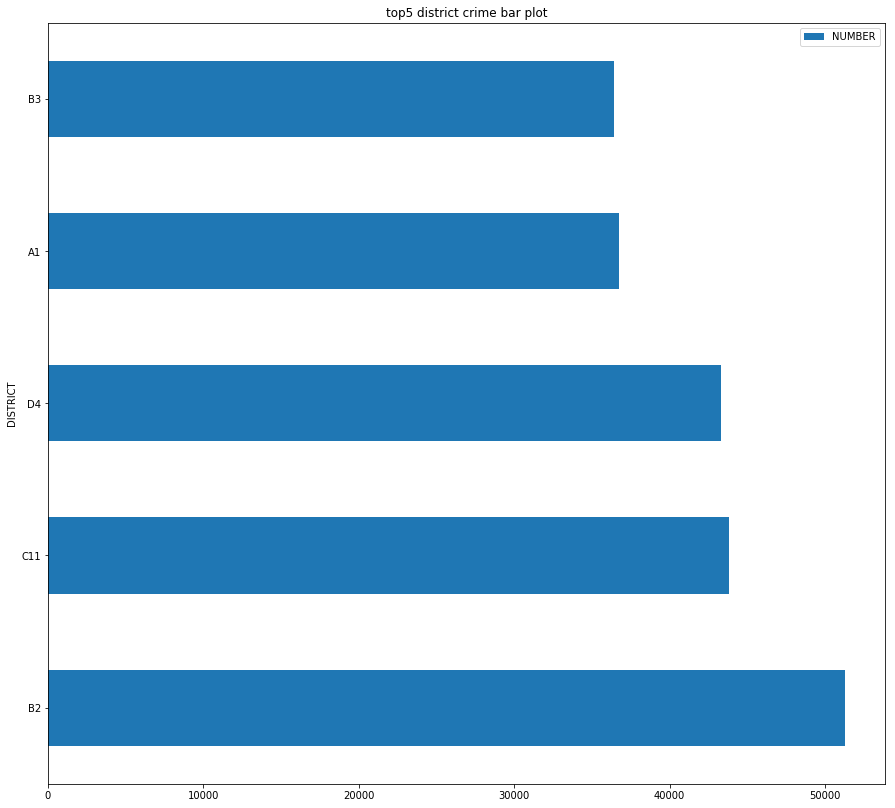

In [15]:
p0=top5.plot.barh(title=r'top5 district crime bar plot',figsize=(15,14))
p0fig=p0.get_figure()
p0fig.savefig('./top5_district_crime_bar.png')
plt.show()

## Visualization-by YEAR

In [16]:
yeargroup=original.groupby(by='YEAR')

In [17]:
count=yeargroup.count()

In [18]:
yearnumber=pd.DataFrame(count.iloc[:,0])

In [19]:
yearnumber.rename(columns={'INCIDENT_NUMBER':'NUMBER'},inplace=True)

In [20]:
yearnumber

,NUMBER
YEAR,
2015,53392
2016,99134
2017,100938
2018,74356


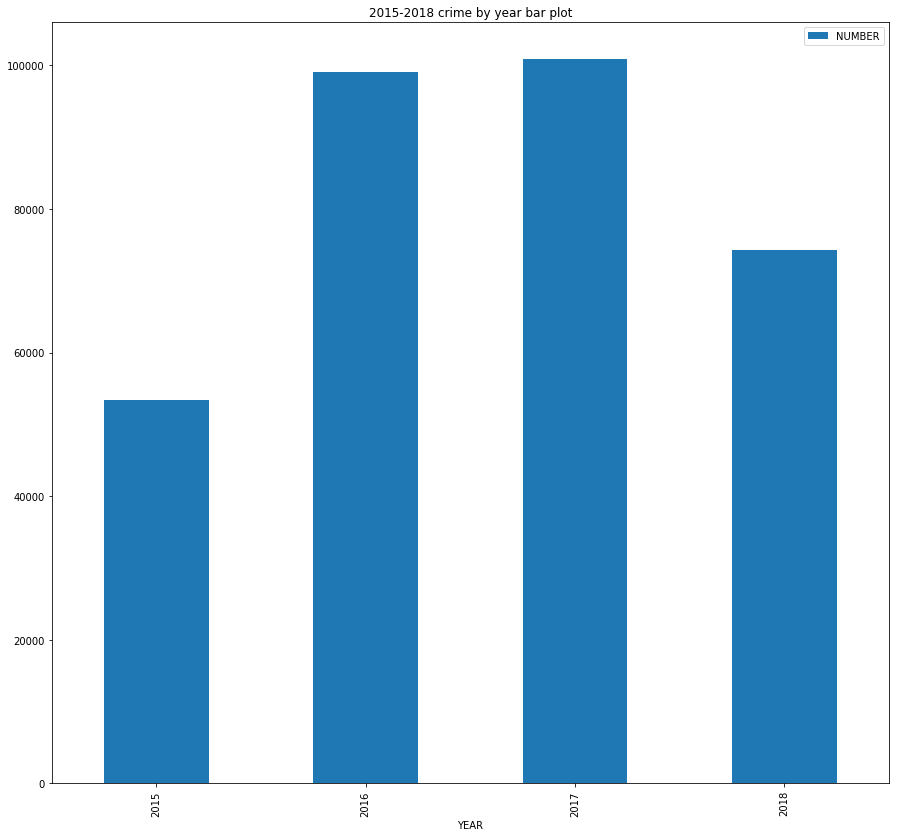

In [21]:
p2=yearnumber.plot.bar(title=r'2015-2018 crime by year bar plot',figsize=(15,14))
p2fig=p2.get_figure()
p2fig.savefig('./total_by_year_bar.png')
plt.show()

## Shooting crime summary and Visualization

In [22]:
original['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [23]:
original.shape

(327820, 17)

In [24]:
original['SHOOTING']=original['SHOOTING'].fillna('N')

In [25]:
original['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

In [26]:
shooting=original.loc[:,'SHOOTING']
shooting=pd.get_dummies(shooting)

In [27]:
original=original.join(shooting)

In [28]:
original.drop(columns='SHOOTING',inplace=True)

In [29]:
original.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,N,Y
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",1,0
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)",1,0
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)",1,0
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)",1,0
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)",1,0


In [30]:
shootcrime=pd.pivot_table(original,index='YEAR',columns='DISTRICT',values='Y',aggfunc=np.sum)

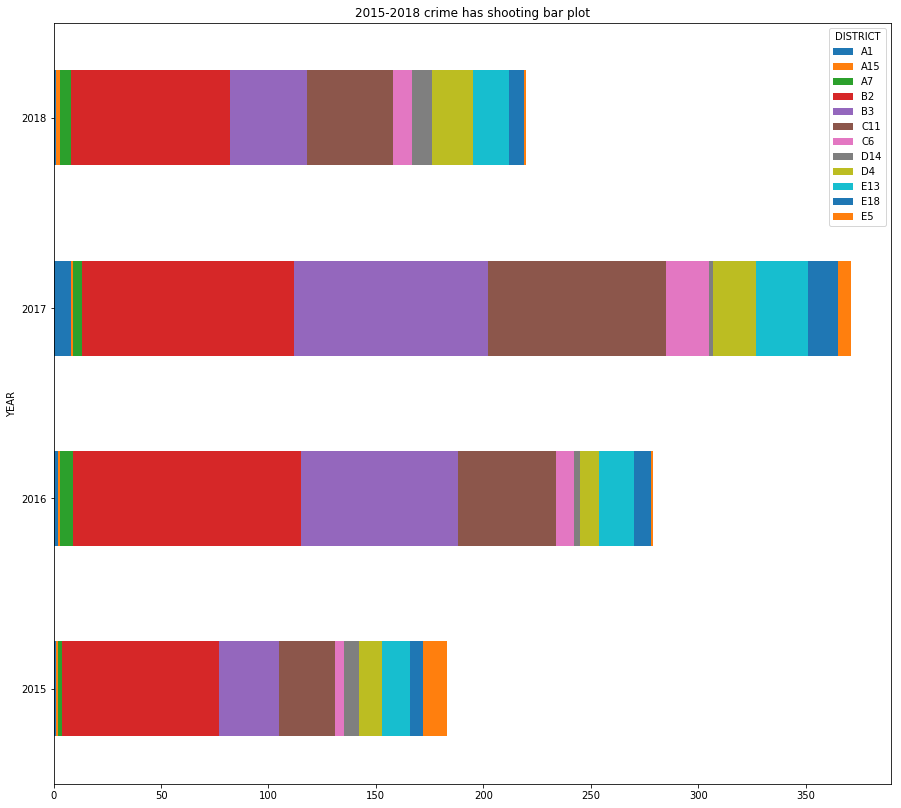

In [31]:
p3=shootcrime.plot.barh(title=r'2015-2018 crime has shooting bar plot',figsize=(15,14),stacked=True)
p3fig=p3.get_figure()
p3fig.savefig('./total_shooting_crime_barh.png')
plt.show()

In [32]:
shootcrime

DISTRICT,A1,A15,A7,B2,B3,C11,C6,D14,D4,E13,E18,E5
YEAR,,,,,,,,,,,,
2015,1,1,2,73,28,26,4,7,11,13,6,11
2016,2,1,6,106,73,46,8,3,9,16,8,1
2017,8,1,4,99,90,83,20,2,20,24,14,6
2018,1,2,5,74,36,40,9,9,19,17,7,1


In [33]:
districtSum=shootcrime.apply(np.sum)
districtSum=pd.DataFrame(districtSum)

In [34]:
districtSum=districtSum.rename(columns={0:r'shooting total'})

In [35]:
districtSum=districtSum.sort_values(by=r'shooting total',ascending=False)

In [36]:
top5=districtSum.iloc[0:5,:]

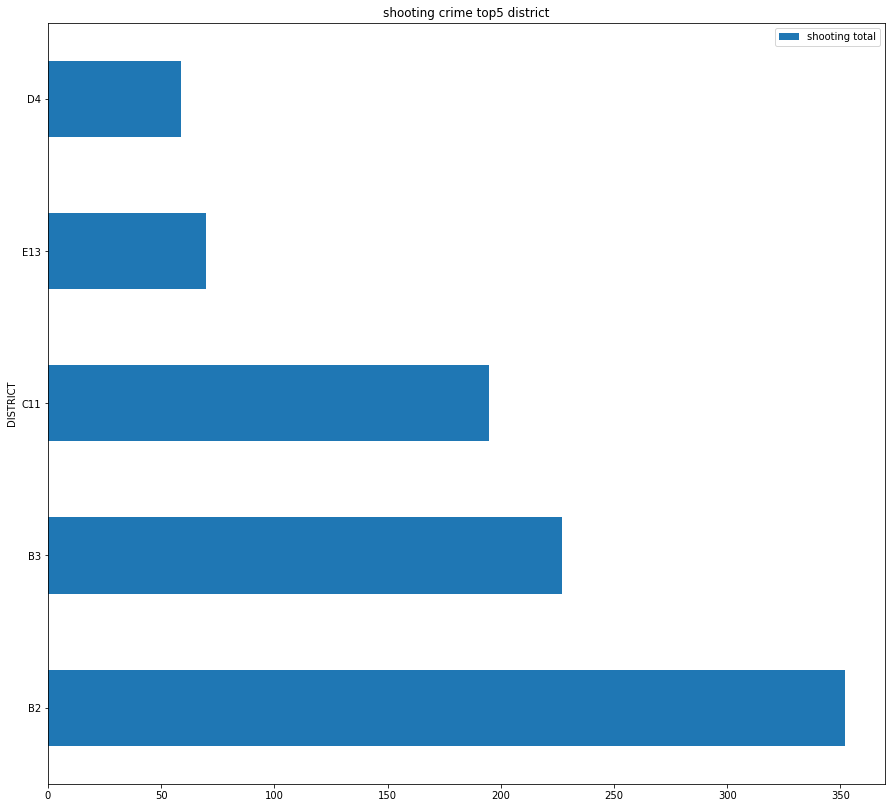

In [37]:
p4=top5.plot.barh(title=r'shooting crime top5 district',figsize=(15,14))
p4fig=p4.get_figure()
p4fig.savefig('./shooting_crime_top5_bar.png')
plt.show()

## Visualization-by Month

In [38]:
byMonth=original.groupby(by='MONTH')

In [39]:
Monthcount=byMonth.count()

In [40]:
MonthNumber=pd.DataFrame(Monthcount.iloc[:,0])

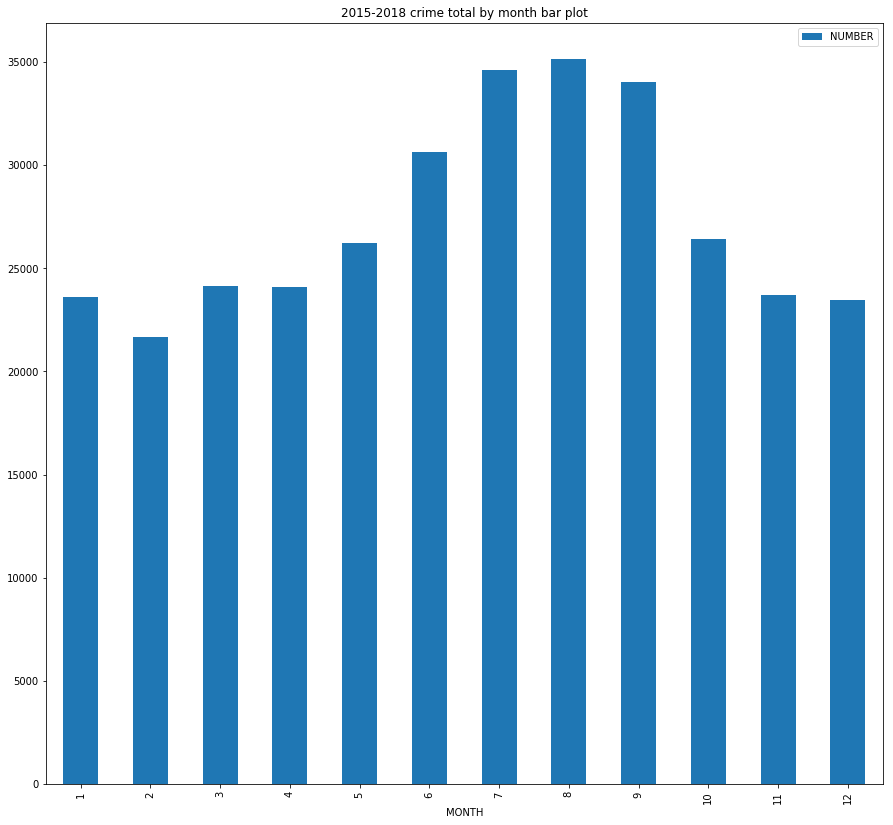

In [41]:
MonthNumber=MonthNumber.rename(columns={'INCIDENT_NUMBER':'NUMBER'})
p5=MonthNumber.plot.bar(title=r'2015-2018 crime total by month bar plot',figsize=(15,14))
p5fig=p5.get_figure()
p5fig.savefig('./total_by_month_bar.png')
plt.show()